In [43]:
'''
    Author:     Matthew Ogden
    Created:    04 Nov 2020
Description:    For the newest version of images creation
'''
print("HI")
from os import path, listdir
from sys import path as sysPath
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

# For loading in Matt's general purpose python libraries
sysPath.append( path.abspath( "Support_Code/" ) )
sysPath.append( path.abspath( "Image_Creator/" ) )
import general_module as gm
import info_module as im
import main_image_creator as ic
import main_SIMR as simr
gm.test()
im.test()
ic.test()
simr.test()


tInfo = im.target_info_class( targetDir = '../spam_data_pl3/587722984435351614/', printAll = False, newInfo=False)
#tInfo = im.target_info_class( targetDir = '../spam_data_pl3/587722984435351614/', printAll = False, newInfo=True)
runDirList = tInfo.iter_runs( )
rInfo = im.run_info_class( runDir = runDirList[0], printAll = False )
if rInfo.status == False:
    print("NOOOOOO")

gParamClass = im.group_score_parameter_class()
gParamClass.addGroupParam( tInfo.get('score_parameters') )
gParamClass.saveParam( 'param/test.json' )


HI
GM: Hi!  You're in Matthew's module for generally useful functions and classes
IM: Hi!  You're in Matthew Ogden's information module for SPAM
IC: Hi!  You're in Matthew's main code for all things image creation.
SIMR: Hi!  You're in Matthew's main program for all things galaxy collisions
IM: run_info_class.__init__
	 - runDir:  /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00000/
	 - printBase:  True
	 - printAll:  False
	 - newInfo:  False
	 - newRun:  False


In [2]:

p1 = tInfo.addScoreParam( paramLoc = 'param/t2.json' )
if p1 == None:
    print("Oh No")
    
p2 = tInfo.addScoreParam( paramLoc = 'param/t3.json' )
if p1 == None:
    print("Oh No")

print(len(tInfo.get('score_parameters')))
print(tInfo.get('score_parameters'))

2
{'test_v2': {'name': 'test_v2', 'simArg': {'name': '100k', 'nPts': '100k'}, 'imgArg': {'name': 'zoo_0', 'comment': 'Developemental image parameters for 587722984435351614', 'image_size': [1024, 1024], 'pixel_centers': {'1': [513, 514], '2': [309, 608]}}, 'scoreType': 'target', 'targetName': 'zoo', 'cmpArg': {'cmpMethod': 'correlation'}}, 'test_v3': {'name': 'test_v3', 'simArg': {'name': '100k', 'nPts': '100k'}, 'imgArg': {'name': 'zoo_1', 'comment': 'Developemental image parameters for 587722984435351614', 'image_size': [100, 100], 'pixel_centers': {'1': [50, 50], '2': [33, 66]}}, 'scoreType': 'target', 'targetName': 'zoo', 'cmpArg': {'cmpMethod': 'correlation'}}}


In [3]:
# end processing run dir

arg = gm.inArgClass()
gparam = im.group_score_parameter_class()
gparam.readParam('param/wndcharm.json')
#im.pprint(gparam.group)


arg.runDir = runDirList[0]
arg.printAll = False
arg.score_parameters = gparam.group
arg.overwrite = True

#ic.image_creator_run(arg)



In [4]:
arg = gm.inArgClass()
gparam = im.group_score_parameter_class()
gparam.readParam('param/wndcharm.json')
#im.pprint(gparam.group)

arg.targetDir = '../spam_data_pl3/587722984435351614/'
arg.newImage = True
arg.score_parameters = gparam.group

#simr.pipelineTarget( arg=arg )

tInfo = im.target_info_class(targetDir = arg.targetDir)
tInfo.status

runDirList = tInfo.iter_runs( n=3 )


In [51]:
def plotImages(imgList,space=1):
    f, axarr = plt.subplots(int(len(imgList)/3)+1,3)
    f.set_size_inches(15,len(imgList)*space)
    print(type(axarr))
    print(axarr.shape)
    for i, img in enumerate(imgList):
        axarr[int(i/3),i%3].imshow(img,cmap='gray',)

#plotImages([img,img,img,img,img])

In [45]:
def getWndImages( rInfo ):
    
    imgLocList = rInfo.getAllImgLocs()
    imgList = []
    
    for imgLoc in imgLocList:
        # Only get wndcharm images
        if 'wndcharm' not in imgLoc: continue
        
        img = gm.readImg(imgLoc)
        
        # Check if image already exists
        foundMatch = False
        for oldImg in imgList:
            diff = np.abs(img-oldImg)
            if np.sum(diff) < 0.001:
                foundMatch = True
        
        if not foundMatch:
            imgList.append(img)
    return imgList

wndImgList = getWndImages(rInfo)
print('got images')

got images


<class 'numpy.ndarray'>
(7, 3)


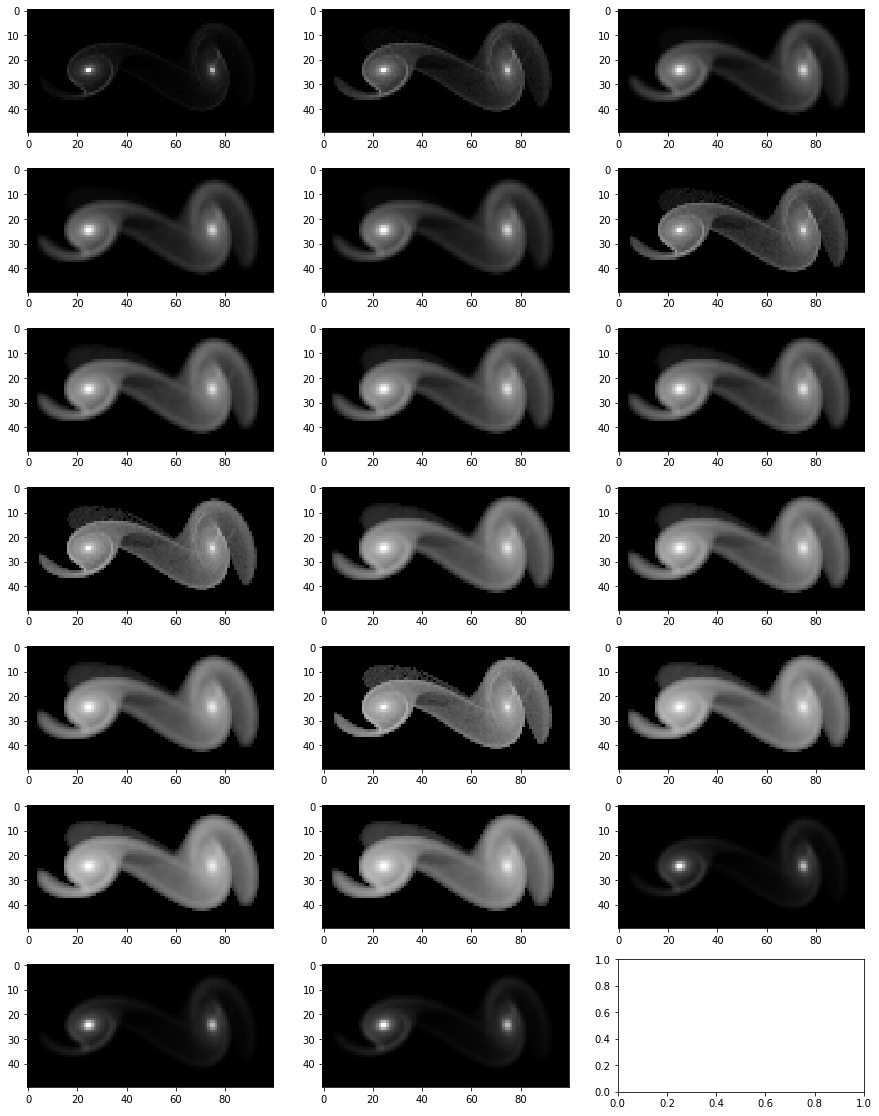

In [52]:
plotImages(wndImgList)

IM: run_info_class.__init__
	 - runDir:  /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00060/
	 - printBase:  True
	 - printAll:  False
	 - newInfo:  False
	 - newRun:  False
<class 'numpy.ndarray'>
(7, 3)


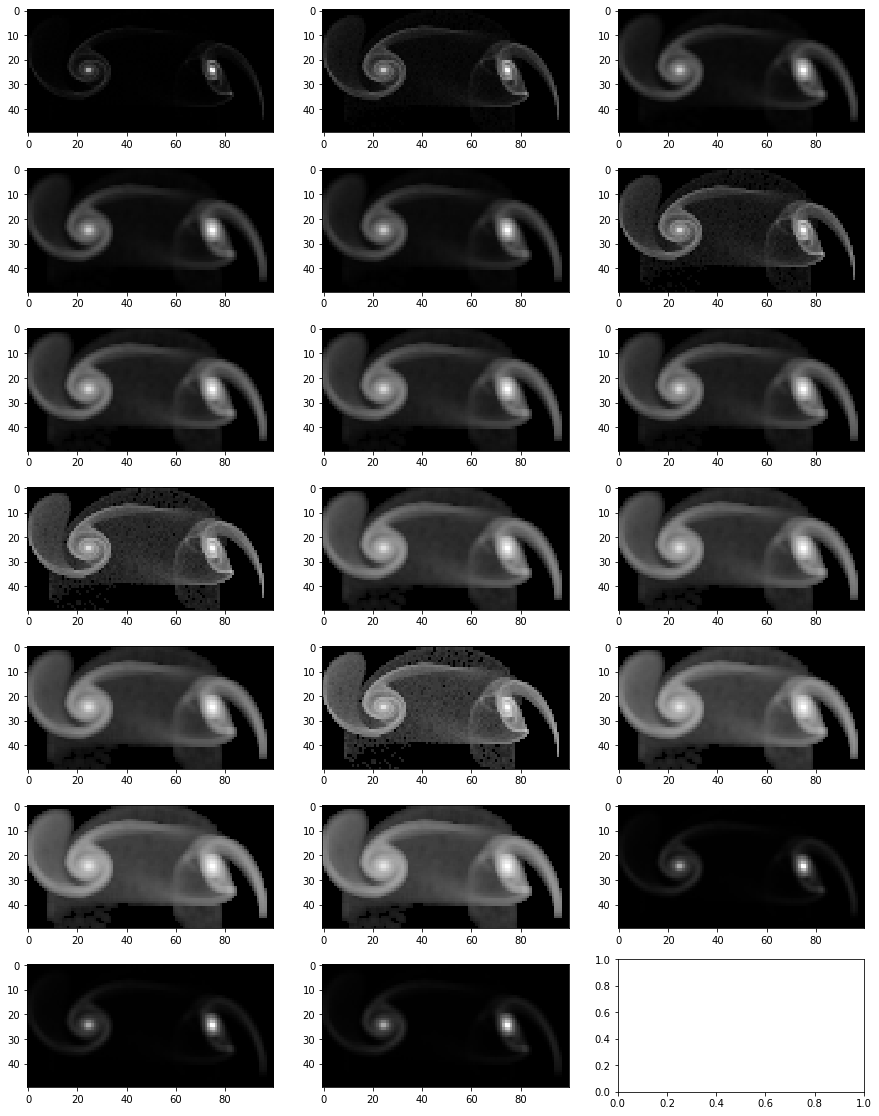

In [11]:
rInfo2 = im.run_info_class(runDir=runDirList[60])
wndImgList = getWndImages(rInfo2)
plotImages(wndImgList)

In [6]:
gparam.saveParam('param/wndcharm.json')

In [7]:
print('boop')

boop


In [8]:
rl = tInfo.iter_runs( )
print(len(rl))

print(len(rl[5:-1]))
rl2 = rl[5::10]
rl3 = rl2[0:10]
#print(rl3)
for rd in rl3:
    print(rd)

1293
1287
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00005/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00015/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00025/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00035/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00045/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00055/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00065/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00075/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00085/
/mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00095/


In [67]:
runDirList = tInfo.iter_runs()
print(len(runDirList))

runDirList = runDirList[0::10][0:10]
print(len(runDirList))
imgList = []

for rDir in runDirList:
    rInfo = im.run_info_class(runDir=rDir,printBase=False)
    imgLoc = rInfo.findImgLoc( pName = 'wndcharm_22')
    img = None
    if imgLoc != None:
        #img = gm.readImg(imgLoc, toSize=(100,100) )
        img = gm.readImg(imgLoc, )
    
    if type(img) != type(None):
        imgList.append(img)
    
    print(len(imgList),rDir,end='\r')
    print(len(imgList),)

print(len(imgList))

1293
10
1 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00000/
2 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00010/
3 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00020/
4 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00030/
5 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00040/
6 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00050/
7 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00060/
8 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00070/
9 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00080/
10 /mnt/c/Users/ogden/OneDrive/Desktop/galStuff/spam_data_pl3/587722984435351614/gen000/run_00090/
10


<class 'numpy.ndarray'>
(4, 3)


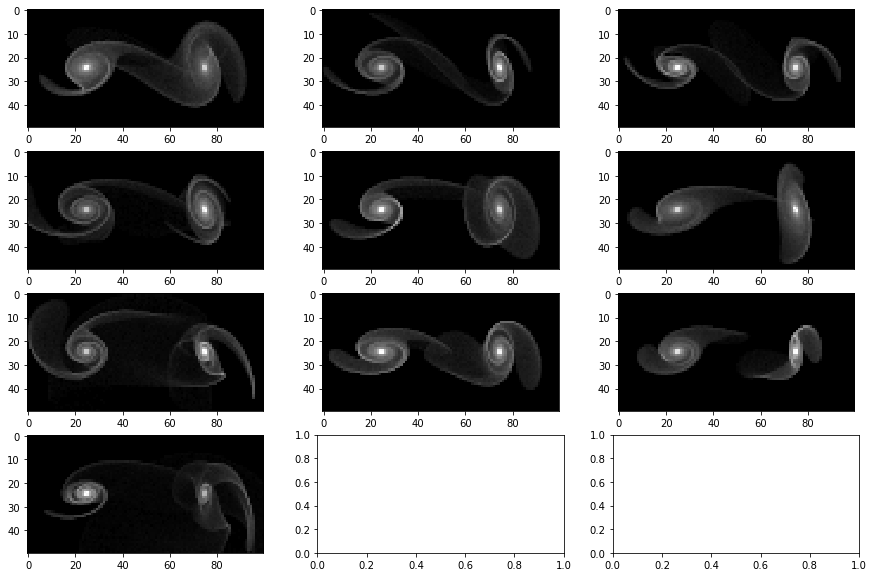

In [68]:
plotImages(imgList[0:10],space=1)